In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.6.0+cu124'

In [ ]:
#build sample data using linear regerssion simple equation
# y =weight * X + bias
#we are creating dataset
weight =0.7
bias =0.3
X =torch.arange(0,1,0.02)#range from 0 to 1 and start and step 0.02
y=weight*X+bias
X.shape,y.shape

(torch.Size([50]), torch.Size([50]))

In [ ]:
#Generate random number
X #size 50

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [ ]:
y #size 50

tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
        0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
        0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
        0.8040, 0.8180, 0.8320, 0.8460, 0.8600, 0.8740, 0.8880, 0.9020, 0.9160,
        0.9300, 0.9440, 0.9580, 0.9720, 0.9860])

In [ ]:
#till now we create dataset with shape 50
#now we need to split data to train and test

In [ ]:
# split the data into training and testing [80 % traning ][20% testing]
train_split =int(0.8*len(X))
#meaning 40 value for train => 80 % traning and 10 for test => 20% testing
X_train,X_test=X[:train_split],X[train_split:]
y_train,y_test=y[:train_split],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
    '''
    Plots predictions is a function to plot data and if you have a prediction you can compare it to the orignal data.
    '''
    plt.figure(figsize=(10,7))
    #plot training data
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")
    #plot test data
    plt.scatter(test_data,test_labels,c="g",s=4,label="Test Data")

    #if you have a prediction
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
    #show the legand
    plt.legend(prop={"size":14})

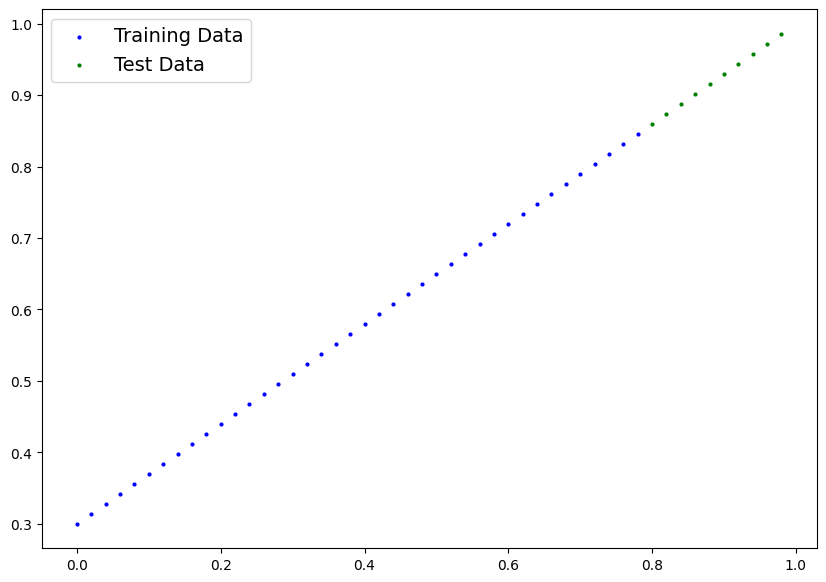

In [ ]:
plot_predictions()
#this is data point of equation
#traing data 80%
#test data 20% i want model not to see it while traning

In [ ]:
#how to build pytorch model
#there is two way to build model first  nn.Module  AND second one  is sequential model
#best way using nn.Module that more general way
#what is nn.Module?
#this is class that inherate all binding blocks in pytorch
#meaning that it include
#nn.Module contain linear layer ,embedding layer ,estm layer,getting recurrent neron network layers ,convulsions layers
#nn.Module contian all layers you need to build neron network layers

In [ ]:
class LinearRegression(nn.Module): #linearRegressionModel inherate from nn.Module
    #__init__ is first think to build neron network and next step is super => this is constant step
    #this is fixed step when build neron network using pytorch
    def __init__(self):
        super().__init__()
        #in neron network i don't know the equation i have input and output and need to build neron network
        #i need network to predict the value of weight and value of biase
        #create linear layer
        #to build simple neron networkwe need two paramters only
        #as we say nn contian all of thinks you need
        #in the following code we need to build one nerone with random value
        #requires_grad=True => mean the weights of model and change based on input and output
        #requires_grad=False => mean the weights is unable to change (freez)
        #every neron has weight
        #this number of weight change based on input that enter model and output that i need
        #weights at first was random untill reach optimal number
        #all data type in pytorch is float
        #forward path say image cat or dog => haapen after training
        #backward path (backward progation) happen at time of training only => change weights to reach optimal
        #buildin blocks of model is weights and bias
        self.weights=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
        #we make to paraemter for neron network weights and bias as we need to know his value
        #why not make oaramter for x => bec. x enter training phase
        #is this enough for simple neruon network
        #no we build __init__ that intialize inside it building blocks that used in neron networks (self.weights,self.bias) we can change this paramter to be Linear layer,convolution layer,LSTM Layer
        # we choose "nn.parameter" to make value => قيمه رقميه وحيده

        #what is forward?
        #we have x as input to neron network
        #input in linearRegressionModel define it in forward function
        #forward =>كاني بمسك خيط وبعديه في اجزاء الي انا عايز اعديه فيها
        #forward job =>pass input in layers through building blocks
        #IN general any Pytorch model has two function __init__ as essential method and forward

    # The forward method should be defined at the class level, not inside __init__
    def forward(self,x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias

In [ ]:
#optional step to reproduce result
#check the contant of this model
torch.manual_seed(46)
#create an instanceof the model
model_0 =LinearRegression()

In [ ]:
list(model_0.parameters())
#model paramter contian two paramter self.weights and self.bais
#model two paramter make random intialize to values
#random value change by change number of torch.manual_seed(46)


[Parameter containing:
 tensor([-0.1318], requires_grad=True),
 Parameter containing:
 tensor([0.5319], requires_grad=True)]

In [ ]:
# objective from neuron network to learn till make value of weights=-0.1318 and
# bias=0.5319

In [ ]:
model_0.state_dict() #كاني بقوله ارسملي جوا مودل ده
#weights => value is tensor([-0.1318]))
#bias=>value is tensor([0.5319])

OrderedDict([('weights', tensor([-0.1318])), ('bias', tensor([0.5319]))])

In [ ]:
X_test

tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
        0.9800])

In [ ]:
#we need to make prediction with model before training
#how to make a prediction using the model to see performe before training and after training
#we have three models in pytorch
#1.Training mode => i will edite in paramter
#2.inferance mode => make freeze for network as no paramter will change in this network as we can say requires_grad=False
#3.nograd mode => not important
with torch.inference_mode():
    y_preds=model_0(X_test)
#reurn back to forward method to perform equation self.weights*x+self.bias

In [ ]:
#to make sure of both of number equal
print(len(X_test))
print(len(y_preds))

10
10


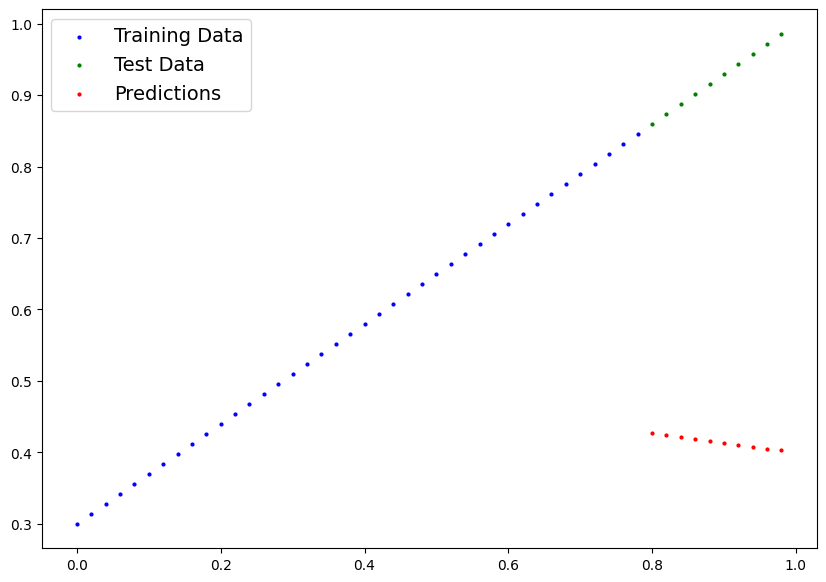

In [ ]:
#y_preds => with red color
#Model should perform with green points => make red point fir one green point
plot_predictions(predictions=y_preds)

In [ ]:
#first we need to make loss function
loss_fn =nn.L1Loss()# Mean aboulte error to meaure how we are far from test data

In [ ]:
#second step we use optimzer
#function of optimzer to update weights
#most famous optimzer is Gradient Desent
#i will give to SGD the parameter of model and optimizer will update it by value of learning rate
#ex : 0.03+0.01=0.04
#old weight 0.03
#learning rate 0.01
#new weight 0.04
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

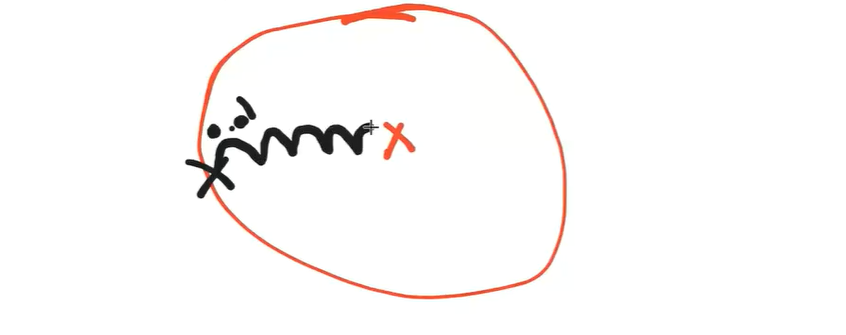

to make any training loop

---
# Pytorch training loop and testing loop for the traing loop , we will build the following steps:


1.   Forwad pass
2.   Calculte the loss => measure how far from Target
3.   Zero gradient => placeholder => make update for weight بنسبه قد ايه
4.   Perform backpropagation on the loss =>make update for model on correct   
     direction
5.   Update The optimizer(gradient descent) => that make model move in correct
     direction from pervious step



In [ ]:
torch.manual_seed(42)

epochs=100

#create some lists to track results

train_loss_values =[]
test_loss_values =[]
epoch_count =[]

for epoch in range(epochs):
  #training
  model_0.train() #make update to all paramters in model

  #1.Forwad pass
  y_preds=model_0(X_train) # -> (y_pred, y_train)
  #2.Calculte the loss
  loss=loss_fn(y_preds, y_train)
  #3.Zero gradient
  optimizer.zero_grad()
  #4.Perform backpropagation on the loss
  loss.backward()
  #Update The optimizer(gradient descent)
  optimizer.step()

  #prefer in pytorch when design traing loop design with it testing loop (Valodation loop)
  #as when end loop go and and evalution as we see in next step to get testing loss
  #as we print testing loss while we work we know what happen

  # Testing
  #to make tasting while training
  #put the model in the evalution mode
  model_0.eval()

  with torch.inference_mode(): #inference_mode mean not change in paramter but in training mode we change prameter
    test_pred=model_0 (X_test)# X_test => unseen data

    #2.calculte the tset loss
    test_loss=loss_fn(test_pred, y_test)

  #print what's going on
  if epoch % 10 ==0 :
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch : {epoch} | MAE Train loss : {loss} | MAE Test loss : {test_loss}")
    #results show that traing loss decrease and testing loss decrease
    #Model try to get output on unseen data

Epoch : 0 | MAE Train loss : 0.17914220690727234 | MAE Test loss : 0.5027517080307007
Epoch : 10 | MAE Train loss : 0.1659395694732666 | MAE Test loss : 0.45555439591407776
Epoch : 20 | MAE Train loss : 0.1575285643339157 | MAE Test loss : 0.4199022650718689
Epoch : 30 | MAE Train loss : 0.15157732367515564 | MAE Test loss : 0.3921101987361908
Epoch : 40 | MAE Train loss : 0.14685073494911194 | MAE Test loss : 0.3702954351902008
Epoch : 50 | MAE Train loss : 0.14285072684288025 | MAE Test loss : 0.3524954319000244
Epoch : 60 | MAE Train loss : 0.13908018171787262 | MAE Test loss : 0.3380855619907379
Epoch : 70 | MAE Train loss : 0.13559016585350037 | MAE Test loss : 0.32706576585769653
Epoch : 80 | MAE Train loss : 0.13210013508796692 | MAE Test loss : 0.31604599952697754
Epoch : 90 | MAE Train loss : 0.12861013412475586 | MAE Test loss : 0.30502623319625854


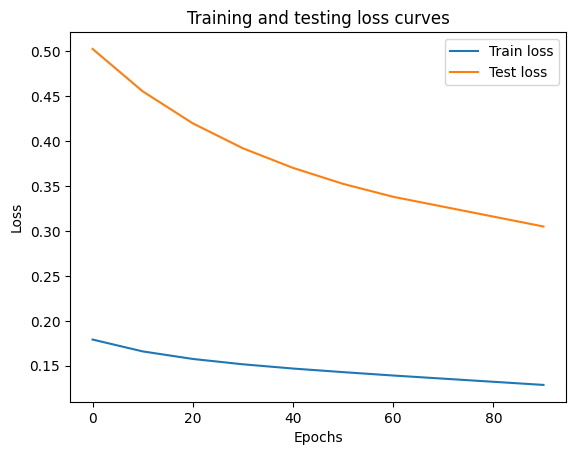

In [ ]:
#plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
#both line are downword mean we are move in correct way

In [ ]:
#new weight |new bias
#-> old value before traning ([('weights', tensor([-0.1318])), ('bias', tensor([0.5319]))])
model_0.state_dict()
#results mean weights change

OrderedDict([('weights', tensor([0.0769])), ('bias', tensor([0.5594]))])

In [ ]:
#till now we have model paramter updates from pervious step
#we need to pass X_test on model_0
#but now model_0 when paramters updated
#we need to get y_preds_train after training
model_0.eval()

with torch.inference_mode():
  y_preds_train=model_0(X_test)


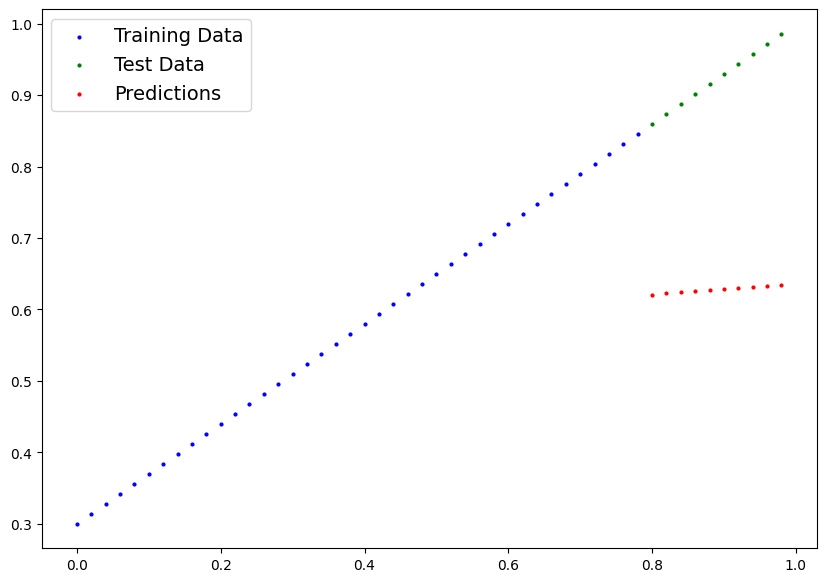

In [ ]:
plot_predictions(predictions=y_preds_train)
#model make more performance then last time

In [ ]:
 #pyrotch model extension =>pt /pth
 torch.save(model_0,'./model-0.pt')
 #not optimal way to save model in pytorch

In [ ]:
#optimal way use state dictionary to save model
#for example it save space and first one save architecture of model with all phases and state dictionary  save weights only
from pathlib import Path
#create a directory
MODEL_PATH=path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)
#craete model save path
MODEL_NAME='01-workflow-model.pth'
MODEL_SAVE_PATH=MODEL_PATH /MODEL_NAME

torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

In [ ]:
#how to build neron network with layers and activation functions
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer1=nn.Linear(in_features=1,out_features=5) #has one neron as input and produce 5 neronas output
        self.act1=nn.ReLU()
        self.layer2=nn.Linear(in_features=5,out_features=1) #second layes take 5 neron and get one neron as output
#inside forward we decided how x pass throug layers
    def forward(self,x:torch.Tensor)->torch.Tensor:
        out=self.layer1(x)
        out2=self.act1(out)
        out=self.layer2(out2)
        return out